### Data Acquisition

https://api.collegefootballdata.com/api/docs/?url=/api-docs.json#/games/getTeamRecords


```curl -X GET "https://api.collegefootballdata.com/games?year=2020&seasonType=regular" -H  "accept: application/json"```

In [206]:
import pandas as pd
import webweb

df = pd.read_json("data/Football_Games.json")
print('Total number of D1 college football games scheduled: ' + str(len(df)))
df['home_conference'] = df['home_conference'].replace([None], 'FCS')
df['away_conference'] = df['away_conference'].replace([None], 'FCS')

Total number of D1 college football games scheduled: 413


In [207]:
x = df.groupby("home_conference").count()[['home_id']]
x.columns = ['Home Games']
y = df.groupby("away_conference").count()[['away_id']]
y.columns = ['Away Games']
z = x.merge(y, left_index=True, right_index=True, how='outer')
z = z.fillna(0)
z['Delta'] = z['Home Games'] - z['Away Games']
z

,Home Games,Away Games,Delta
ACC,83.0,70,13.0
American Athletic,52.0,59,-7.0
Big 12,55.0,45,10.0
Conference USA,69.0,66,3.0
FBS Independents,26.0,15,11.0
FCS,0.0,31,-31.0
Mountain West,1.0,1,0.0
SEC,70.0,70,0.0
Sun Belt,57.0,56,1.0


In [208]:
df_h = df[['home_team', 'home_conference']]
df_h.columns = ['Team', "Conference"]
df_a = df[['away_team', 'away_conference']]
df_a.columns = ['Team', "Conference"]
df_teams = pd.concat([df_a,df_h])
df_teams = df_teams.drop_duplicates()
print('Number of teams participating in football this year: ' + str(len(df_teams)))

Number of teams participating in football this year: 91


### Network

In [209]:
df_conference = df[df['conference_game']==True]
print(len(df_conference))
df_non_conference = df[df['conference_game']==False]
print(len(df_non_conference))

322
91


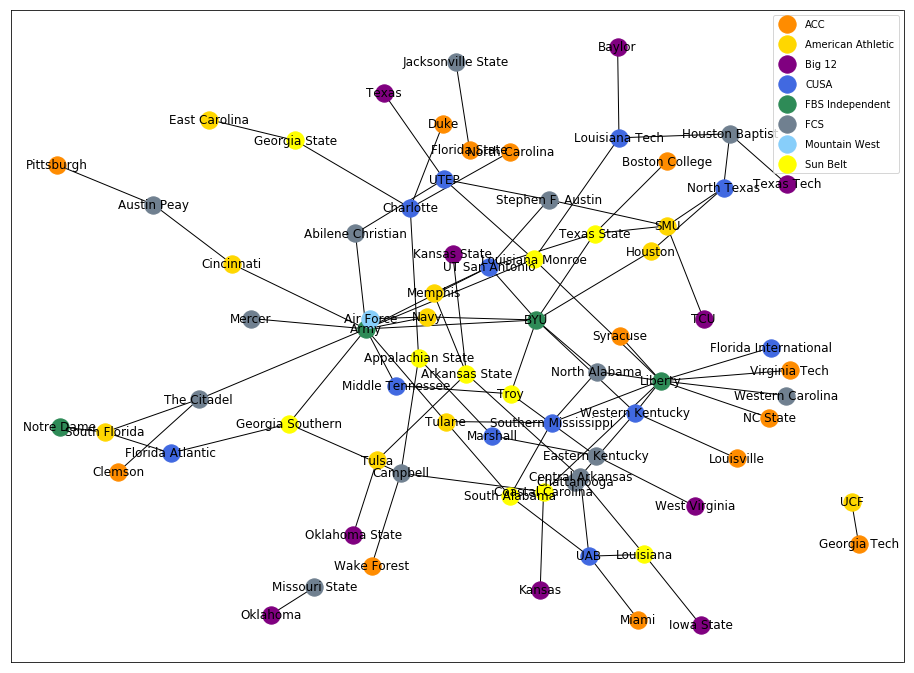

In [210]:
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

df = df[df['conference_game']==False]

df_h = df[['home_team', 'home_conference']]
df_h.columns = ['Team', "Conference"]
df_a = df[['away_team', 'away_conference']]
df_a.columns = ['Team', "Conference"]
df_teams = pd.concat([df_a,df_h])
df_teams = df_teams.drop_duplicates()

df_edges = df[['week', 'away_team','home_team']]


G = nx.from_pandas_edgelist(df_edges, 'away_team', 'home_team', edge_attr=['week'])
plt.figure(figsize=(16,12))
position = nx.spring_layout(G, k=0.3)


ACC = df_teams[df_teams['Conference']=="ACC"]
ACC = list(ACC['Team'])
AA = df_teams[df_teams['Conference']=="American Athletic"]
AA = list(AA['Team'])
Big12 = df_teams[df_teams['Conference']=="Big 12"]
Big12 = list(Big12['Team'])
CUSA = df_teams[df_teams['Conference']=="Conference USA"]
CUSA = list(CUSA['Team'])
Independent = df_teams[df_teams['Conference']=="FBS Independents"]
Independent = list(Independent['Team'])
FCS = df_teams[df_teams['Conference']=="FCS"]
FCS = list(FCS['Team'])
MW = df_teams[df_teams['Conference']=="Mountain West"]
MW = list(MW['Team'])
SEC = df_teams[df_teams['Conference']=="SEC"]
SEC = list(SEC['Team'])
SB = df_teams[df_teams['Conference']=="Sun Belt"]
SB = list(SB['Team'])


nx.draw_networkx_nodes(G,position, nodelist=ACC, node_color="darkorange")
nx.draw_networkx_nodes(G,position, nodelist=AA, node_color="gold")
nx.draw_networkx_nodes(G,position, nodelist=Big12, node_color="purple")
nx.draw_networkx_nodes(G,position, nodelist=CUSA, node_color="royalblue")
nx.draw_networkx_nodes(G,position, nodelist=Independent, node_color="seagreen")
nx.draw_networkx_nodes(G,position, nodelist=FCS, node_color="slategray")
nx.draw_networkx_nodes(G,position, nodelist=MW, node_color="lightskyblue")
nx.draw_networkx_nodes(G,position, nodelist=SEC, node_color="firebrick")
nx.draw_networkx_nodes(G,position, nodelist=SB, node_color="yellow")

nx.draw_networkx_edges(G,position)
nx.draw_networkx_labels(G,position)
plt.legend(['ACC', 'American Athletic', 'Big 12', 'CUSA', 'FBS Independent', 'FCS', 'Mountain West', 'Sun Belt'], labelspacing=1)


plt.savefig("images/Out_of_Conference_Network.png", dpi=300)

### Out of State Network

Games with teams crossing state lines: 86.2%


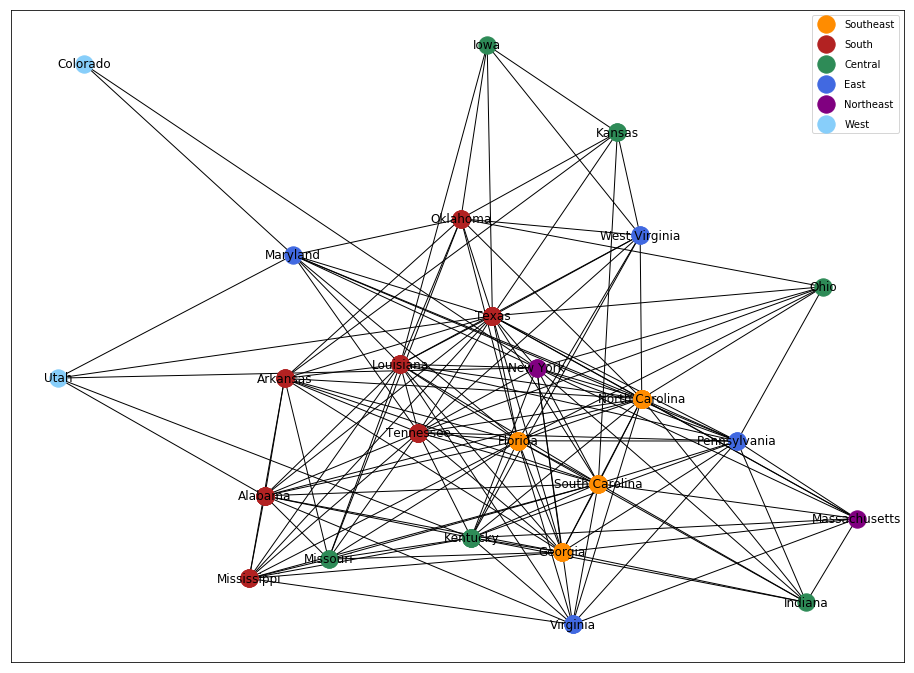

In [211]:
import numpy as np
df = pd.read_json("data/Football_Games.json")
college_info = pd.read_csv("data/ci2.csv")
ci = pd.Series(college_info.State.values,index=college_info.Team).to_dict()
df['Away State'] = df['away_team'].map(ci)
df['Home State'] = df['home_team'].map(ci)
df['Out_of_State'] = np.where(df['Home State'] == df['Away State'], False, True)
df2 = df[df['Out_of_State'] == True]
print("Games with teams crossing state lines: " + str(round(len(df2)/float(len(df)), 4)*100) +"%")

df_h = df2[['home_team', 'home_conference', 'Home State']]
df_h.columns = ['Team', "Conference", "State"]
df_a = df2[['away_team', 'away_conference', "Away State"]]
df_a.columns = ['Team', "Conference", "State"]
df_teams = pd.concat([df_a,df_h])
df_teams = df_teams.drop_duplicates()

df_edges = df2[['week', 'Home State','Away State']]

G = nx.from_pandas_edgelist(df_edges, 'Home State','Away State', edge_attr=['week'])
plt.figure(figsize=(16,12))
position = nx.spring_layout(G, k=0.3)


southeast = ['Georgia', 'Florida','South Carolina', 'North Carolina']
south = ['Alabama', 'Tennessee', "Louisiana", "Texas", "Mississippi", "Arkansas", "Oklahoma"]
west = ['Colorado', "Utah"]
central = ["Kansas", "Missouri", "Indiana", "Ohio", "Kentucky", "Iowa"]
east = ['Virginia', "West Virginia", "Maryland", "Pennsylvania"]
northeast = ['New York', "Massachusetts"]

SE = df_teams[df_teams['State'].isin(southeast)]
SE = list(SE['State'])
S = df_teams[df_teams['State'].isin(south)]
S = list(S['State'])
C = df_teams[df_teams['State'].isin(central)]
C = list(C['State'])
E = df_teams[df_teams['State'].isin(east)]
E = list(E['State'])
NE = df_teams[df_teams['State'].isin(northeast)]
NE = list(NE['State'])
W = df_teams[df_teams['State'].isin(west)]
W = list(W['State'])

nx.draw_networkx_nodes(G,position, nodelist=SE, node_color="darkorange")
nx.draw_networkx_nodes(G,position, nodelist=S, node_color="firebrick")
nx.draw_networkx_nodes(G,position, nodelist=C, node_color="seagreen")
nx.draw_networkx_nodes(G,position, nodelist=E, node_color="royalblue")
nx.draw_networkx_nodes(G,position, nodelist=NE, node_color="purple")
nx.draw_networkx_nodes(G,position, nodelist=W, node_color="lightskyblue")

nx.draw_networkx_edges(G,position)
nx.draw_networkx_labels(G,position)
plt.legend(['Southeast', 'South', 'Central', 'East', 'Northeast', 'West'], labelspacing=1)
plt.savefig("images/Out_of_State_Network.png", dpi=300)

In [213]:
x = df2.groupby(["Home State", "Away State"]).count()

res = x.reset_index().groupby('Home State').agg(lambda x: x.nunique())
res = res[['Away State']]
res = res.sort_values("Away State", ascending=False)
res.head(10)

,Away State
Home State,
Florida,16
Texas,15
Louisiana,13
North Carolina,13
South Carolina,12
New York,11
Georgia,11
Tennessee,11
Kentucky,9


In [203]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='Games')
df2 = s.to_frame().sort_values('Games', ascending=False)

In [204]:
df2

,Games
Texas,19
North Carolina,18
Florida,18
Louisiana,17
South Carolina,17
Tennessee,16
Kentucky,15
New York,15
Georgia,15
Pennsylvania,14
